In [1]:
## Digits

In [2]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from gympy.layers import Linear, Relu, Sigmoid, Softmax, Tanh
from gympy.networks import NeuralNetwork
from gympy.optimizers import GradientDescent
from gympy.loss import CategoricalCrossEntropy
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
digits = load_digits()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
X_train.shape

(1347, 64)

In [5]:
Y = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1,1)).T
Y.shape

(10, 1347)

In [6]:
X = StandardScaler().fit_transform(X_train).T
print(X.shape)


(64, 1347)


In [7]:

n_iter=390
model = NeuralNetwork(
    layers = [
        Tanh(n_input=64, n_output=32, dropout_rate=0.3),
        Softmax(n_input=32, n_output=10)
    ],
    optimizer = GradientDescent(learning_rate=1e-2),
    loss = CategoricalCrossEntropy(),
    n_iter=n_iter
)

In [8]:
tt = model.forward(X[:,0:1])
tt

array([[0.09998096],
       [0.1005513 ],
       [0.09915091],
       [0.09909784],
       [0.1011927 ],
       [0.09917156],
       [0.09962217],
       [0.10000222],
       [0.10081051],
       [0.10041982]])

In [9]:
yy = Y[:,0:1]
yy

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [10]:
np.log(0.5)

-0.6931471805599453

In [11]:
CategoricalCrossEntropy()(tt, Y[:,0:1])

2.3063705348046404

0 cost 2.3019228612230727
150 cost 2.2732292953540596
300 cost 2.144263413093858
450 cost 1.8400793423786235
600 cost 1.4247075663108757
750 cost 1.09948565844612
900 cost 0.9787204837756607
1050 cost 0.8368121313417536
1200 cost 0.6660624365405043
1350 cost 0.7050747179507967
1500 cost 0.48427099605289126
1650 cost 0.38943772663569076
1800 cost 0.42869907825658
1950 cost 0.30534531878585863
2100 cost 0.2605885019792648
2250 cost 0.5804995268154236
2400 cost 0.31786497222457066
2550 cost 0.25688556781713007
2700 cost 0.2413587134392185
2850 cost 0.27737957014915127
3000 cost 0.1949936749493266
3150 cost 0.22054176528298877
3300 cost 0.17652687396265407
3450 cost 0.1377579993725201
3600 cost 0.12773377682898698
3750 cost 0.2047156647082058
3900 cost 0.18487133557346522
4050 cost 0.19826568421596108
4200 cost 0.11931193429756957
4350 cost 0.12666461194692916
4500 cost 0.23185114211318983
4650 cost 0.118104826131488
4800 cost 0.20951189465792583
4950 cost 0.10129443378915501


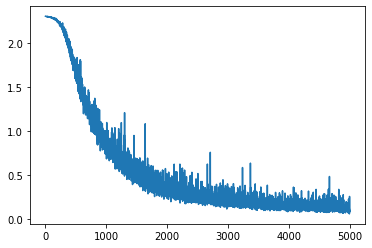

In [12]:
n_iter=5000
model.train(X,Y, show=150, n_iter=n_iter)
plt.plot(np.arange(n_iter), model.cost)

In [13]:
model.forward(X[:,[453]])

array([[1.96607676e-05],
       [5.25914852e-03],
       [9.53272663e-04],
       [2.58402288e-02],
       [3.68092723e-04],
       [1.00733557e-03],
       [8.08063123e-06],
       [9.56246861e-01],
       [2.69138247e-03],
       [7.60593665e-03]])

In [14]:
test_idx = np.random.choice(X.shape[1],16, replace=False)

In [15]:
prob = model.forward(X[:,test_idx])
pred = np.argmax(prob,axis=0)

true_vals = np.argmax(Y[:,test_idx], axis=0)

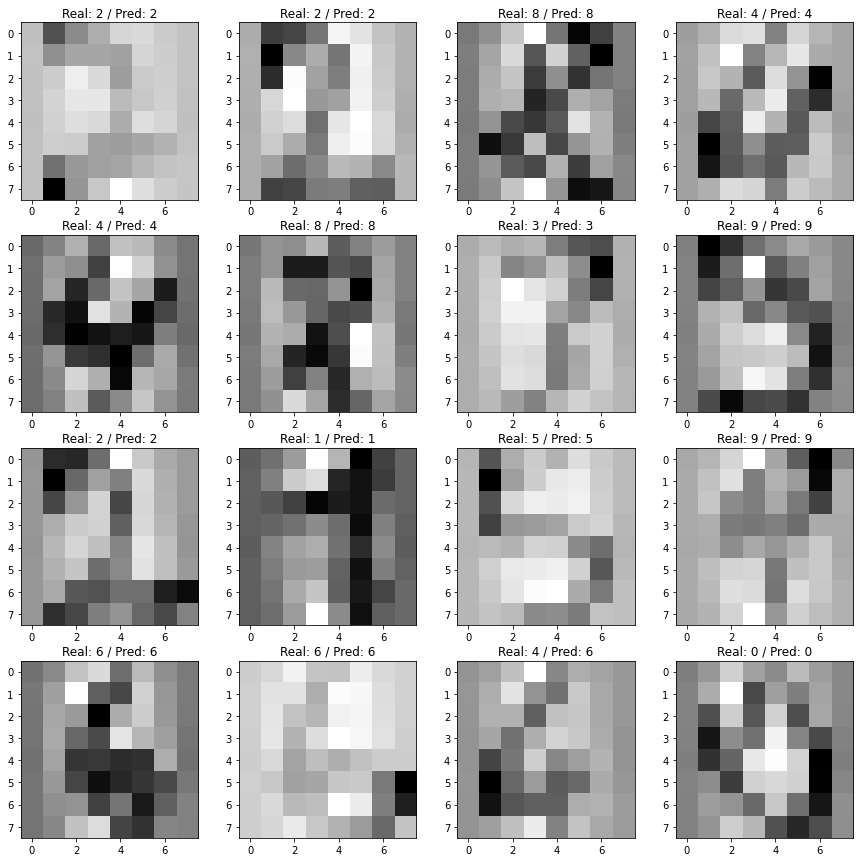

In [16]:
fig, axes = plt.subplots(4,4, figsize=(15,15))

for i,(idx, ax) in enumerate(zip(test_idx, axes.flatten())):
    ax.imshow(X[:,idx].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Real: {true_vals[i]} / Pred: {pred[i]}')